In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import ribopy
from ribopy import Ribo
from ribopy.core.get_gadgets import get_region_boundaries, get_reference_names

In [2]:
ribo_path   = "all.ribo"
ribo_object = Ribo(ribo_path, alias = ribopy.api.alias.apris_human_alias)

In [5]:
# 21-mers
lengths_filter_21 = {"GMP_Ven_A": [20, 29], "GMP_Ven_B": [20, 29], "GMP_vehicle_A": [20, 29], "GMP_vehicle_B": [20, 29],
                     "HSC_Ven_A": [20, 30], "HSC_Ven_B": [20, 29], "HSC_vehicle_A": [20, 29], "HSC_vehicle_B": [20, 29]}
lengths_filter = {"GMP_Ven_A": [30, 38], "GMP_Ven_B": [30, 38], "GMP_vehicle_A": [30, 38], "GMP_vehicle_B": [30, 38],
                  "HSC_Ven_A": [31, 39], "HSC_Ven_B": [30, 39], "HSC_vehicle_A": [30, 39], "HSC_vehicle_B": [30, 39]}

for exp in ribo_object.experiments:
    min_len, max_len = lengths_filter_21[exp]
    ribo_counts_21 = ribo_object.get_region_counts(experiments=ribo_object.experiments,
                                                   region_name="CDS",
                                                   range_lower=min_len,
                                                   range_upper=max_len,
                                                   sum_references=False,
                                                   alias=True)
ribo_counts_21 = ribo_counts_21.sort_index(axis=0)
ribo_counts_21.index = ribo_counts_21.index.str.replace(r'-\d+$', '', regex=True)
ribo_counts_21 = ribo_counts_21.groupby(ribo_counts_21.index).sum()
ribo_counts_21 = ribo_counts_21.rename(columns=lambda x: 'RIBO_' + x + '_21')

for exp in ribo_object.experiments:
    min_len, max_len = lengths_filter[exp]
    ribo_counts = ribo_object.get_region_counts(experiments=ribo_object.experiments,
                                                region_name="CDS",
                                                range_lower=min_len,
                                                range_upper=max_len,
                                                sum_references=False,
                                                alias=True)
ribo_counts = ribo_counts.sort_index(axis=0)
ribo_counts.index = ribo_counts.index.str.replace(r'-\d+$', '', regex=True)
ribo_counts = ribo_counts.groupby(ribo_counts.index).sum()
ribo_counts = ribo_counts.rename(columns=lambda x: 'RIBO_' + x)

ribo_counts = pd.concat([ribo_counts, ribo_counts_21], axis=1)
# ribo_counts
ribo_counts.sum()
# ribo_counts.to_csv("ribo_counts.txt", sep="\t", index=True)

RIBO_GMP_Ven_A           1541210
RIBO_GMP_Ven_B            691692
RIBO_GMP_vehicle_A       1026356
RIBO_GMP_vehicle_B       1067321
RIBO_HSC_Ven_A           1081430
RIBO_HSC_Ven_B            402164
RIBO_HSC_vehicle_A        970849
RIBO_HSC_vehicle_B        936786
RIBO_GMP_Ven_A_21         383549
RIBO_GMP_Ven_B_21         189917
RIBO_GMP_vehicle_A_21     341125
RIBO_GMP_vehicle_B_21     292816
RIBO_HSC_Ven_A_21         785986
RIBO_HSC_Ven_B_21         221322
RIBO_HSC_vehicle_A_21     451259
RIBO_HSC_vehicle_B_21     403022
dtype: uint64

In [5]:
rna_counts = ribo_object.get_rnaseq()
rna_counts['Reads'] = rna_counts.iloc[:, 2:].sum(axis=1)
rna_counts = rna_counts[['Reads']]
rna_counts = rna_counts.unstack(level=0)
rna_counts.index = rna_counts.index.str.split('|').str[5]
rna_counts = rna_counts.sort_index(axis=0)

rna_counts.columns = rna_counts.columns.get_level_values(1)
rna_counts.reset_index(inplace=True)
rna_counts.index = rna_counts["reference"]
rna_counts.drop(axis=1, columns="reference", inplace=True)
rna_counts = rna_counts.groupby(rna_counts.index).sum()
rna_counts
rna_counts.to_csv("rna_counts.txt", sep="\t", index=True)

experiments,GMP_Ven_A,GMP_Ven_B,GMP_vehicle_A,GMP_vehicle_B,HSC_Ven_A,HSC_Ven_B,HSC_vehicle_A,HSC_vehicle_B
reference,,,,,,,,
0610009B22Rik,438.0,495.0,555.0,399.0,319.0,252.0,538.0,185.0
0610010F05Rik,1901.0,2075.0,2104.0,1854.0,291.0,436.0,1293.0,228.0
0610010K14Rik,159.0,165.0,115.0,159.0,400.0,381.0,105.0,64.0
0610012G03Rik,601.0,616.0,613.0,540.0,904.0,723.0,511.0,260.0
0610030E20Rik,2154.0,1447.0,1400.0,1294.0,500.0,717.0,1258.0,353.0
...,...,...,...,...,...,...,...,...
mt-Nd2,3599.0,4499.0,3396.0,3409.0,6503.0,8776.0,3975.0,1361.0
mt-Nd3,460.0,713.0,451.0,498.0,3792.0,5843.0,533.0,368.0
mt-Nd4l,398.0,374.0,368.0,283.0,279.0,439.0,340.0,112.0


### QC

<Figure size 1500x1000 with 0 Axes>

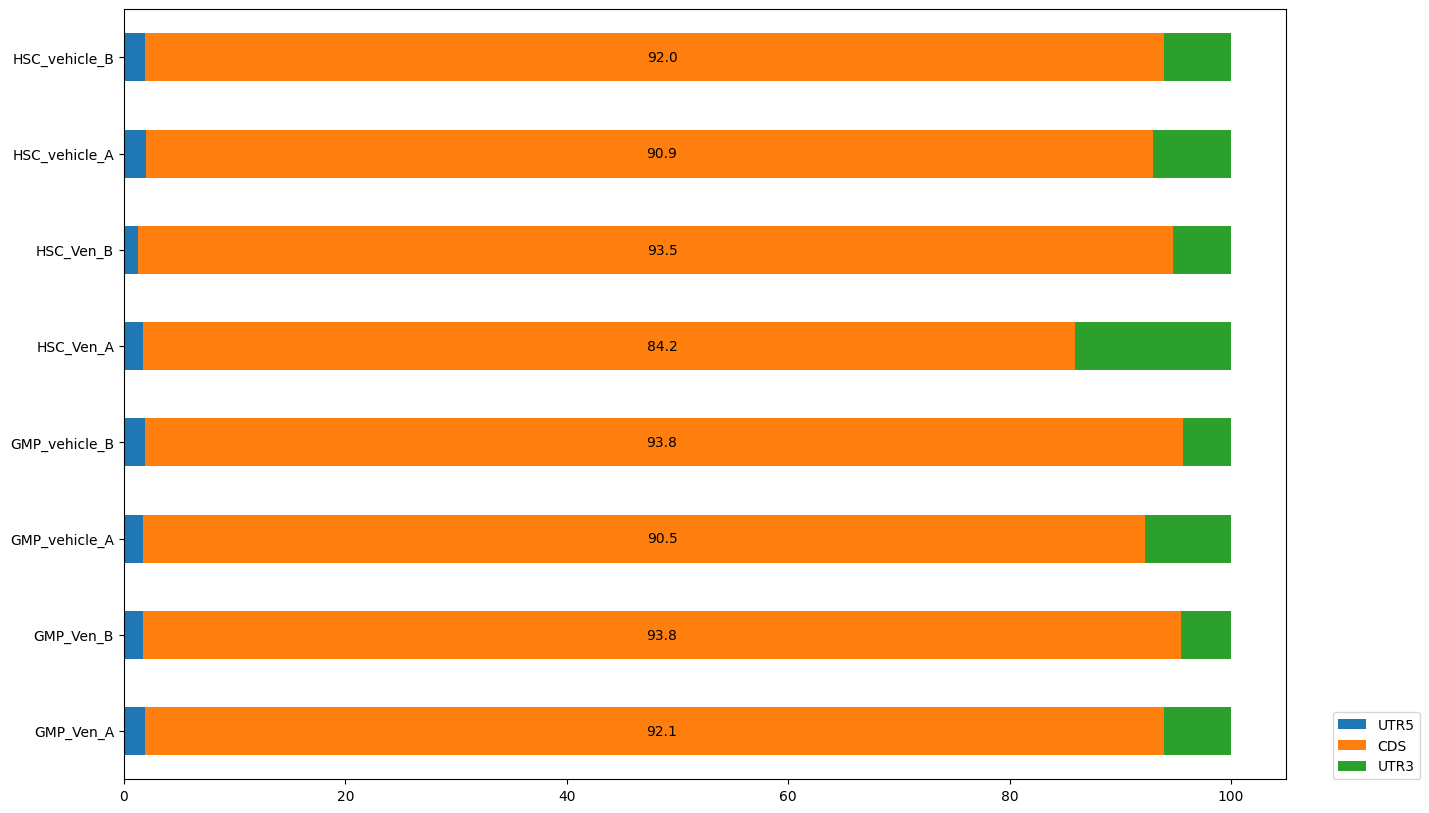

In [5]:
ribo_object.plot_region_counts(experiments = ribo_object.experiments,
                               range_lower = 31,
                               range_upper = 37,
                               horizontal  = True)

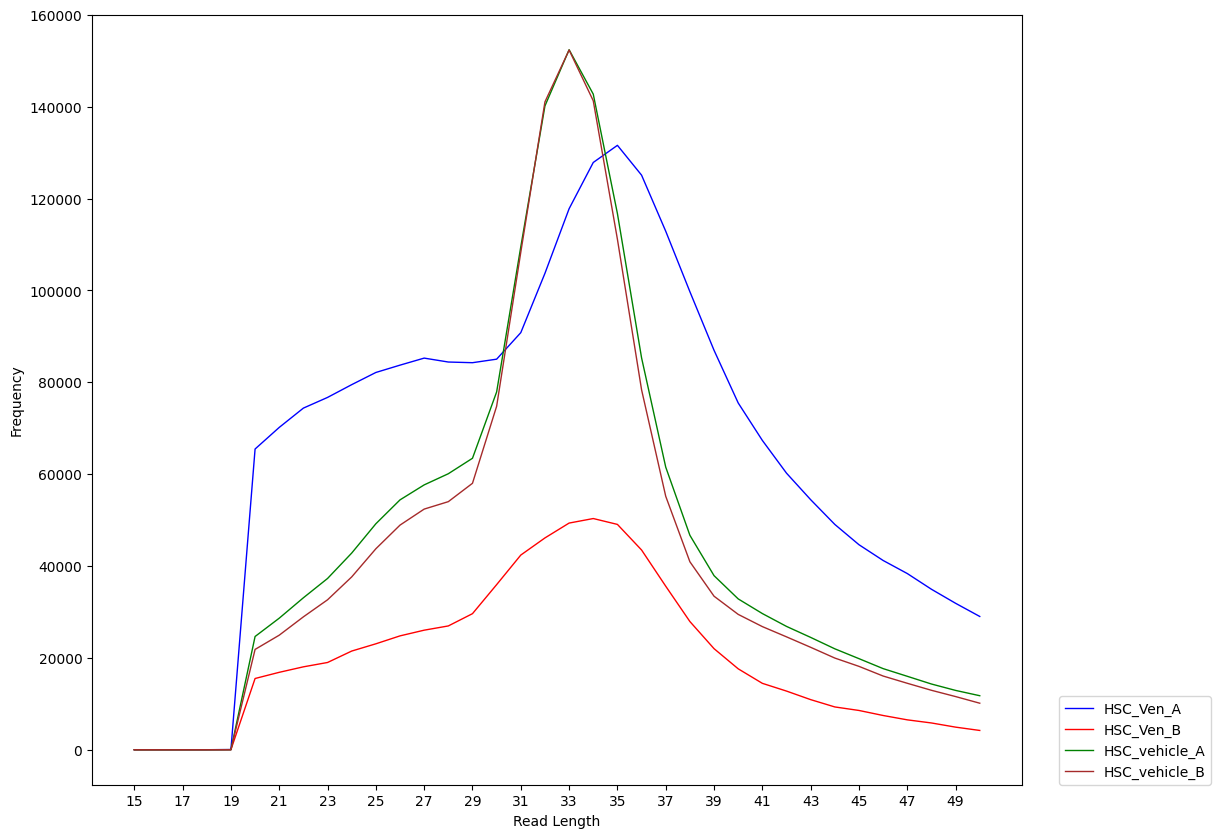

In [37]:
ribo_object.plot_lengthdist(region_type = "CDS",
                            normalize   = False,
                            # experiments = ["GMP_Ven_A", "GMP_Ven_B", "GMP_vehicle_A", "GMP_vehicle_B"])
                            experiments = ["HSC_Ven_A", "HSC_Ven_B", "HSC_vehicle_A", "HSC_vehicle_B"])
                            # experiments = "HSC_Ven_A")

### length_dist = ribo_object.get_length_dist(region_name = "CDS")
length_dist

In [47]:
print("GMP_Ven_A", sum(length_dist.loc[30:38, "GMP_Ven_A"]))
print("GMP_Ven_B", sum(length_dist.loc[26:39, "GMP_Ven_B"]))
print("GMP_vehicle_A", sum(length_dist.loc[29:38, "GMP_vehicle_A"]))
print("GMP_vehicle_B", sum(length_dist.loc[29:37, "GMP_vehicle_B"]))
print("HSC_Ven_A", sum(length_dist.loc[30:39, "HSC_Ven_A"]))
print("HSC_Ven_B", sum(length_dist.loc[25:39, "HSC_Ven_B"]))
print("HSC_vehicle_A", sum(length_dist.loc[28:37, "HSC_vehicle_A"]))
print("HSC_vehicle_B", sum(length_dist.loc[28:37, "HSC_vehicle_B"]))

GMP_Ven_A 1462562
GMP_Ven_B 810099
GMP_vehicle_A 1039783
GMP_vehicle_B 1037807
HSC_Ven_A 1081430
HSC_Ven_B 532608
HSC_vehicle_A 1009810
HSC_vehicle_B 974458


In [49]:
sum(length_dist.loc[30:38, "GMP_Ven_A"])

1462562